In [25]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [26]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

C:\Users\AI02\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


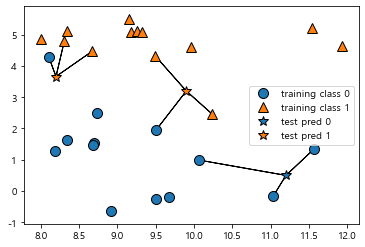

In [27]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

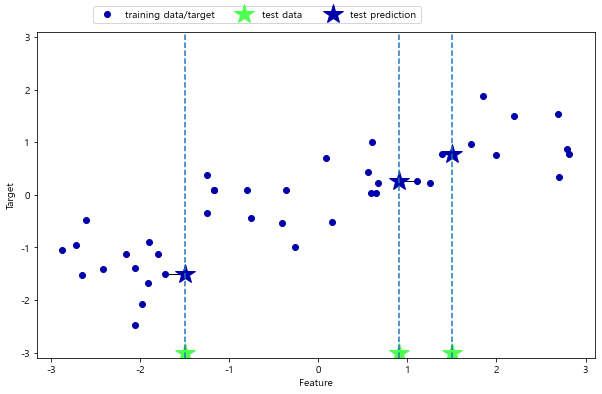

In [28]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

* k=1가 일 경우, 새로운 값이 들어갈 경우, 하나의 feature의 값이 가장 가까운 데이터를 찾아, 해당 데이터가 가르키는 Target으로 예측하게 된다.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [30]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                             random_state=0)

C:\Users\AI02\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


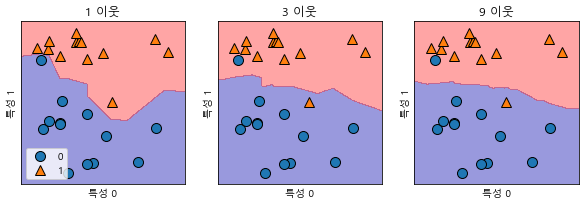

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, 
                                    fill=True, eps=0.5, ax=ax, alpha=.4)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

In [32]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [33]:
cancer = load_breast_cancer()
print("cancer.keys() : \n{}".format(cancer.keys()))
print("유방암 데이터의 행열 : {}".format(cancer.data.shape))

cancer.keys() : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
유방암 데이터의 행열 : (569, 30)


In [34]:
print("특성이름(feature_names) : {}".format(cancer['feature_names']))
print("유방암 데이터의 형태 : ", cancer.data.shape)
print()
print("클래스 이름(target_names) : {}".format(cancer['target_names']))
print("클래스별 샘플 개수 : \n",np.bincount(cancer.target))

특성이름(feature_names) : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
유방암 데이터의 형태 :  (569, 30)

클래스 이름(target_names) : ['malignant' 'benign']
클래스별 샘플 개수 : 
 [212 357]


In [35]:
from sklearn.model_selection import train_test_split

In [44]:
# 입력/출력
X = cancer.data
y = cancer.target

# 데이터 나누기 : 75%, 25% 데이터가 불균형하게 있을 때 traget값도 나누기 startify=y값
# 5:5, 6:4, 7:3, 8:2, 9:1
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        stratify=y, #타겟으로 설정
                                        test_size=0.3,
                                        random_state=77)

In [45]:
print( len(y_train) )
y_1_all = (y == 1).sum() 
y_0_all =  (y == 0).sum() 

print(f"target y의 \n 0의 개수 : {y_0_all} \n 1의 개수 : {y_1_all}")

398
target y의 
 0의 개수 : 212 
 1의 개수 : 357


In [46]:
y_train_1 = (y_train == 1).sum()
y_test_1 = (y_test == 1).sum()

y_train_0 = len(y_train) - (y_train == 1).sum()
y_test_0 = len(y_test) - (y_test == 1).sum()

print("데이터 셋의 target(학습:테스트)의 비율 - 1에 대해서")
print(f"train비율 : {y_train_1/y_1_all}, test비율 : {y_test_1/y_1_all}")

print("데이터 셋의 target(학습:테스트)의 비율 - 0에 대해서")
print(f"train비율 : {y_train_0/y_0_all}, test비율 : {y_test_0/y_0_all}")

데이터 셋의 target(학습:테스트)의 비율 - 1에 대해서
train비율 : 0.7002801120448179, test비율 : 0.29971988795518206
데이터 셋의 target(학습:테스트)의 비율 - 0에 대해서
train비율 : 0.6981132075471698, test비율 : 0.3018867924528302


## 머신러닝 모델 만들고 예측하기
* (1) 모델 만들기
* (2) 모델 학습 시키기(fit)
* (3) 모델을 이용한 값 예측(predict)
* (4) 훈련 데이터를 이용한 정확도 확인
* (5) 테스트 데이터를 이용한 정확도 확인


In [47]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3) # 알고리즘 지정
model.fit(X_train, y_train)  # 학습 
pred = model.predict(X_test) # 예측
pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [49]:
print("학습용 데이터셋 이용 정확도 : {}".format(model.score(X_train, y_train)))
print("테스트 세트의 정확도 : {}".format(model.score(X_test, y_test)))

학습용 데이터셋 이용 정확도 : 0.9547738693467337
테스트 세트의 정확도 : 0.9181286549707602


In [51]:
### k값을 변경시키는 for문
### 모델을 지정
### 평가를 하고
### 평가 결과 저장

k_list = []
tr_acc = []
test_acc = []
k_nums = range(1, 22, 2)

for n in k_nums:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    
    # 정확도 구하기
    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    # 정확도 값 저장
    k_list.append(n)
    tr_acc.append(acc_tr)
    test_acc.append(acc_test)
    
    print("k : ", n)
    print("학습용셋 정확도 : {:.3f}".format(acc_tr))
    print("테스트용셋 정확도 : {:.3f}".format(acc_test))

k :  1
학습용셋 정확도 : 1.000
테스트용셋 정확도 : 0.901
k :  3
학습용셋 정확도 : 0.955
테스트용셋 정확도 : 0.918
k :  5
학습용셋 정확도 : 0.952
테스트용셋 정확도 : 0.924
k :  7
학습용셋 정확도 : 0.952
테스트용셋 정확도 : 0.918
k :  9
학습용셋 정확도 : 0.947
테스트용셋 정확도 : 0.918
k :  11
학습용셋 정확도 : 0.935
테스트용셋 정확도 : 0.918
k :  13
학습용셋 정확도 : 0.935
테스트용셋 정확도 : 0.924
k :  15
학습용셋 정확도 : 0.935
테스트용셋 정확도 : 0.924
k :  17
학습용셋 정확도 : 0.932
테스트용셋 정확도 : 0.930
k :  19
학습용셋 정확도 : 0.932
테스트용셋 정확도 : 0.930
k :  21
학습용셋 정확도 : 0.927
테스트용셋 정확도 : 0.930


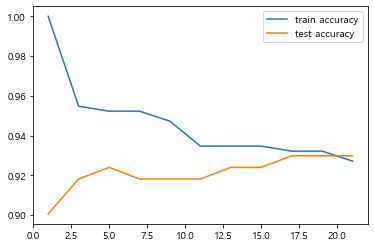

In [61]:
plt.plot(k_list, tr_acc, label='train accuracy')
plt.plot(k_list, test_acc, label='test accuracy')
plt.legend()
# 처음에 과적합이고 점점 줄어듦. k=17일때 차이가 없어 가장 좋음

In [63]:
# tr_acc = []
# test_acc = []
dat = { "tr_acc":tr_acc, "test_acc":test_acc }
data_df = pd.DataFrame(dat, index=k_list)
data_df

,tr_acc,test_acc
1,1.000000,0.900585
3,0.954774,0.918129
5,0.952261,0.923977
7,0.952261,0.918129
9,0.947236,0.918129
11,0.934673,0.918129
13,0.934673,0.923977
15,0.934673,0.923977
17,0.932161,0.929825
19,0.932161,0.929825


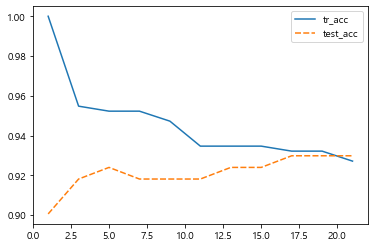

In [64]:
sns.lineplot(data=data_df, palette="tab10")
plt.show()